# Plant skeletonization

This Jupyter notebook replicates the plant skeletonization experiment, specifically focusing on a tomato plant at various growth stages (day 5, day 8, day 13). The notebook calculates Branched Central Spanning Trees (BCST) for different $\alpha$ (alpha) values.

The BCST computation is conducted in two scenarios:

- **With Prior Knowledge:** In this scenario, prior knowledge about the tree's root is utilized.
Instances of terminals corresponding to the root are duplicated, creating a simulated higher density in this specific location.
- **Without Prior Knowledge:** In this case, BCST is computed without any prior information about the tree's root.

In [1]:
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')


In [2]:
import os
import sys
if 'Plant_skeletonization' in os.getcwd():
	os.chdir('../..')
	sys.path.insert(0,os.getcwd())
print(os.getcwd())
print(sys.path[0])

/export/home/enfita/Code/CST_official_github_repo
/export/home/enfita/Code/CST_official_github_repo


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lib.T_datacls import T_data
from scipy.sparse import coo_matrix
from lib.utils.utils import factor_number
import tempfile
import os
from PIL import Image
# import scipy.sparse as sp

from Experiments.Plant_skeletonization.visualization3D import visualize_data_3d,plot_graph_3d,generate_rotation_gif
from Experiments.Plant_skeletonization.load_plantdata import load_plantdata

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


/export/home/enfita/Code/CST_official_github_repo/lib/methods/mSTreg/topology/topology.py:74: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def vec_to_adj(vec):


#### Functions to generate name of folders and filenames of the figures

In [4]:
def define_filename(key,alpha,n,prior=False):
	if prior:
		prior_txt='_prior'
	else:
		prior_txt=''
	return '%s_n=%i_BCST_%0.2f%s'%(key,n,alpha,prior_txt)

def define_foldername(plant_type,plant_num,n):
	return 'Figures/plant_skeleton/%s_plant%i/n=%i/'%(plant_type,plant_num,n)


#### parameters

In [5]:
tdata_dict={}


In [6]:
plant_type='tomato'
plant_num=2 # plant instance

seed=12

#number samples
n=5000

#alpha values of the BCST
alpha_ls=[0,0.5,0.7,0.8,1]

#parameters BCST
maxfreq_mSTreg=3
maxiter_mSTreg=20

# The power to which the values of the edge widths will be raised to improve visualization
power_width=0.7

#max edge-width
max_width=15

factor_rep=5

# if true figures are saved
save=False

#if True gif will be generated
generate_gif=False
num_frames_gif=20


offset_base_root_prior=10

## DAY5

### Load data

/export/home/enfita/Code/CST_official_github_repo/Experiments/Plant_skeletonization/visualization3D.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, s=node_size, cmap='viridis', marker='o')


(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: title={'center': 'Subsampled data with 5000 points'}, xlabel='X', ylabel='Y', zlabel='Z'>)

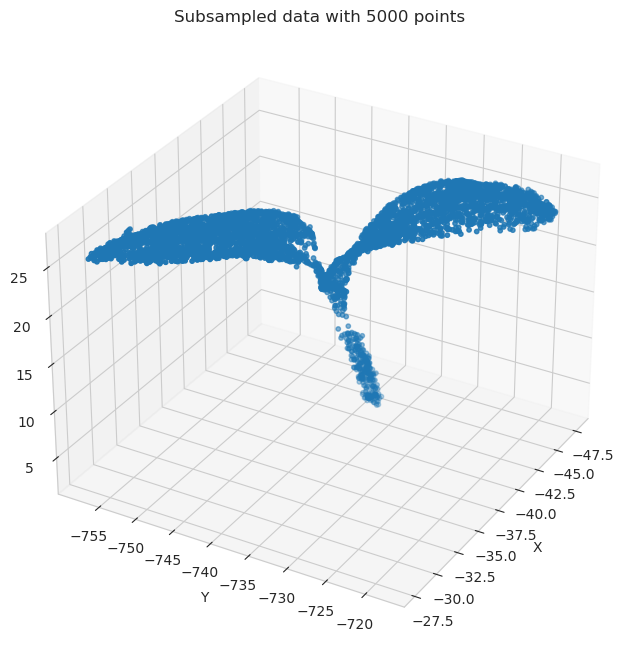

In [7]:
np.random.seed(seed)
#set day plant
day=5

# set visualization angles
elevation_angle=30
azimuthal_angle=30

# load data
data=load_plantdata(plant_type, plant_num, day)
key='%s_plant%i_day%i'%(plant_type,plant_num,day)

#subsample n points
data_sub=data[np.random.choice(np.arange(data.shape[0]),n,replace=False)]

visualize_data_3d(data_sub,title='Subsampled data with %i points'%n,show_plot=False,elevation_angle=elevation_angle,
				  azimuthal_angle=azimuthal_angle)

#### Compute BCST

In [8]:


tdata_dict[key]=T_data(data_sub)
tdata=tdata_dict[key]

for alpha in alpha_ls:
	tdata.compute_BCST(alpha=alpha,return_topo_CST=False,maxfreq_mSTreg=maxfreq_mSTreg,maxiter_mSTreg=maxiter_mSTreg)

INFO:Tdata_logger:Added  'X' to data

INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing mST 

INFO:Tdata_logger:Added  mST to trees

INFO:Tdata_logger:Computing BCST_0.00


best mSTreg obtained in iteration 20


INFO:Tdata_logger:Added  BCST_0.00 to trees

INFO:Tdata_logger:Function compute_BCST took 194.5997 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.50


best mSTreg obtained in iteration 16


INFO:Tdata_logger:Added  BCST_0.50 to trees

INFO:Tdata_logger:Function compute_BCST took 178.2438 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.70


best mSTreg obtained in iteration 16


INFO:Tdata_logger:Added  BCST_0.70 to trees

INFO:Tdata_logger:Function compute_BCST took 199.2360 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.80


best mSTreg obtained in iteration 18


INFO:Tdata_logger:Added  BCST_0.80 to trees

INFO:Tdata_logger:Function compute_BCST took 218.4949 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_1.00


best mSTreg obtained in iteration 9


INFO:Tdata_logger:Added  BCST_1.00 to trees

INFO:Tdata_logger:Function compute_BCST took 170.9509 seconds


/export/home/enfita/Code/CST_official_github_repo/Experiments/Plant_skeletonization/visualization3D.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, s=node_size, cmap='viridis', marker='o')


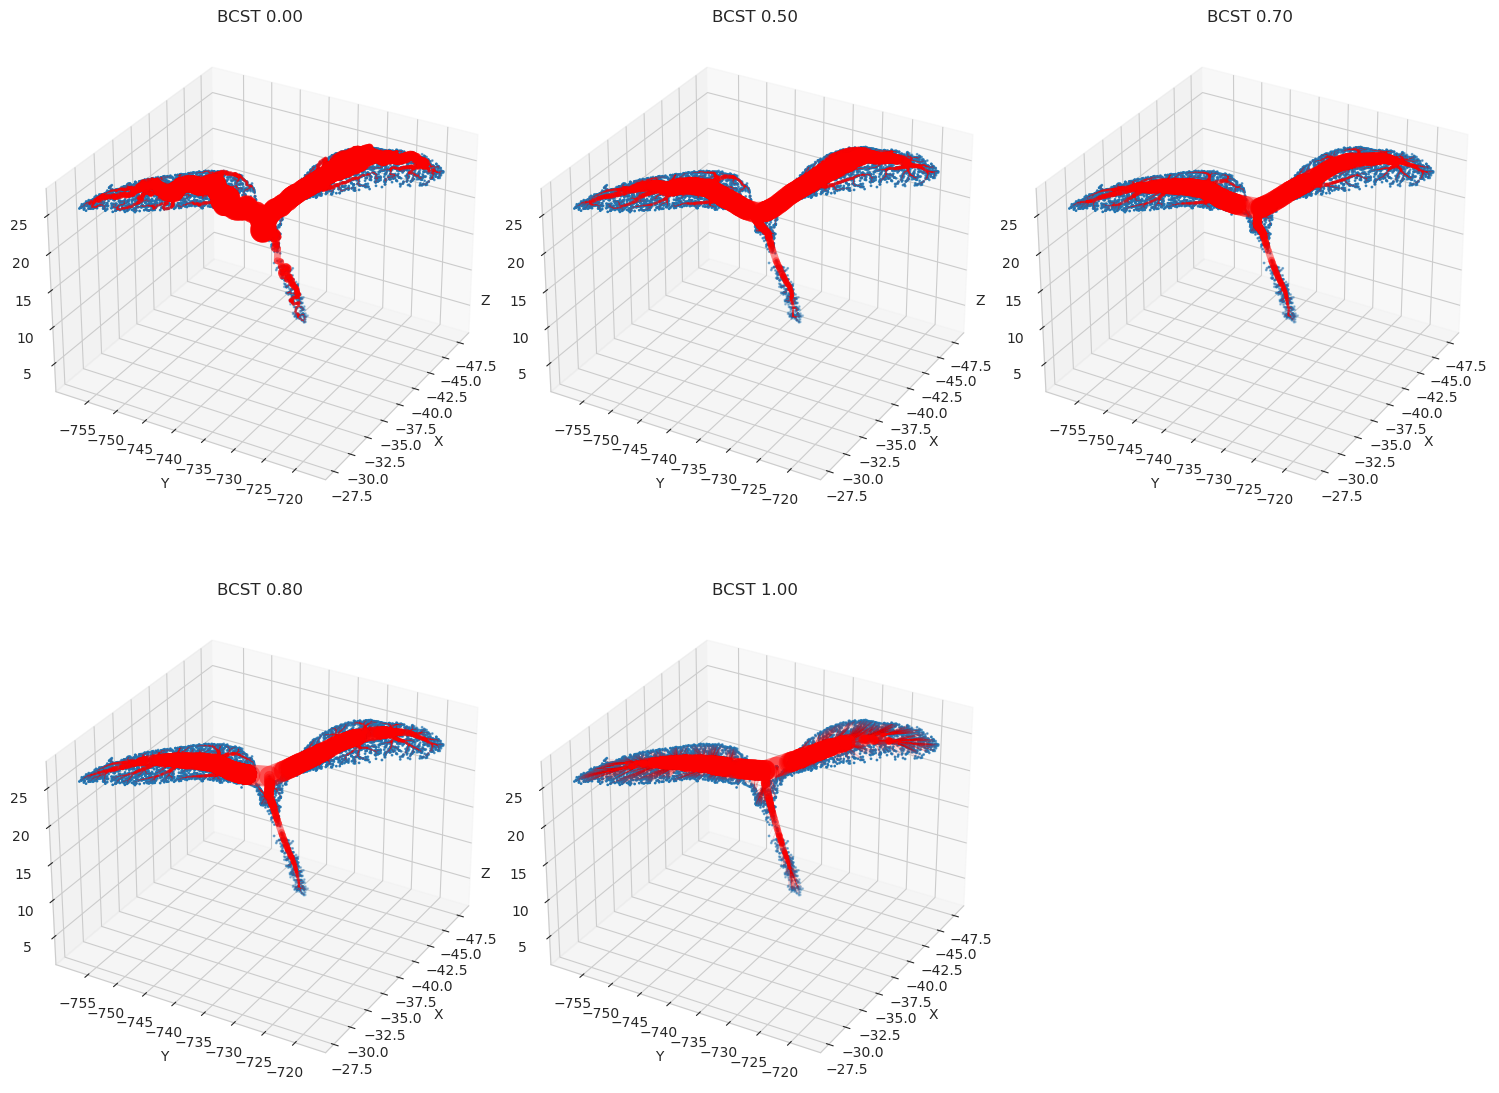

In [9]:
tdata_prior=tdata_dict[key]

k1,k2=factor_number(len(alpha_ls))


separated = False

folder_figures=define_foldername(plant_type,plant_num,n)

if save:
	separated=True
	os.makedirs(folder_figures,True)
for counter_plot,alpha in enumerate(alpha_ls):

	T_flows=tdata.trees['BCST_%0.2f'%alpha].get_T_weighted_by_flows()
	if power_width!=1:
		T_flows.data**=power_width
	T_flows*=max_width/T_flows.max()
	cost=tdata.trees['BCST_%0.2f'%alpha].cost

	coords=tdata.trees['BCST_%0.2f'%alpha].coords

	if separated:
		k1=k2=1
		counter_plot=0

	if save:
		title=''
	else:
		title='BCST %0.2f'%(alpha)
	fig, ax=plot_graph_3d(T_flows,coords,node_size=1,node_colors=None,linewidth_multiplier=1,
				  title=title,show_plot=False,k1=k1,k2=k2,counter_plot=counter_plot,
						  figsize=(15,12),elevation_angle=elevation_angle,
				  azimuthal_angle=azimuthal_angle)
	if save:
		plt.tight_layout()
		filename=define_filename(key,alpha,n,prior=False)
		plt.savefig(folder_figures+filename+'.png')

	if generate_gif:
		generate_rotation_gif(T_flows, coords, node_colors=None, node_size=1,
                       title='BCST %0.2f'%alpha, edge_color='red',
                       figsize=(15,12), num_frames=num_frames_gif, output_filename=folder_figures+filename+'.gif')
plt.tight_layout()
plt.show()

#### Compute BCST with prior root

In [10]:
# set number of times root is repeated
root_reps=factor_rep*len(data_sub)

# identify root as the one with lowest z-coordinate
root=np.argmin(data_sub[:,2])

# consider also as roots the terminals are above a certain threshold from the lowest terminal
pseudo_roots=np.where(data_sub[:,2]<=data_sub[root,2]+offset_base_root_prior)[0]

#set mass of roots
demands=-np.ones(data_sub.shape[0])/(data_sub.shape[0]+root_reps-1)
for r in pseudo_roots:
	demands[r]=1/(data_sub.shape[0]+root_reps-1)
	if r==root:
		demands[root]=root_reps/len(pseudo_roots)/(data_sub.shape[0]+root_reps-1)
	else:
		demands[r] = -root_reps / len(pseudo_roots) / (data_sub.shape[0] + root_reps - 1)

tdata_dict[key+'_prior']=T_data(data_sub)
tdata_prior=tdata_dict[key+'_prior']


for alpha in alpha_ls:
	tdata_prior.compute_BCST(alpha=alpha,return_topo_CST=False,maxfreq_mSTreg=maxfreq_mSTreg,maxiter_mSTreg=maxiter_mSTreg,
							 demands=demands)

INFO:Tdata_logger:Added  'X' to data

INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing mST 

INFO:Tdata_logger:Added  mST to trees

INFO:Tdata_logger:Computing BCST_0.00


best mSTreg obtained in iteration 18


INFO:Tdata_logger:Added  BCST_0.00 to trees

INFO:Tdata_logger:Function compute_BCST took 137.0555 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.50


best mSTreg obtained in iteration 8


INFO:Tdata_logger:Added  BCST_0.50 to trees

INFO:Tdata_logger:Function compute_BCST took 187.4157 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.70


best mSTreg obtained in iteration 17


INFO:Tdata_logger:Added  BCST_0.70 to trees

INFO:Tdata_logger:Function compute_BCST took 222.6053 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.80


best mSTreg obtained in iteration 18


INFO:Tdata_logger:Added  BCST_0.80 to trees

INFO:Tdata_logger:Function compute_BCST took 229.8482 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_1.00


best mSTreg obtained in iteration 9


INFO:Tdata_logger:Added  BCST_1.00 to trees

INFO:Tdata_logger:Function compute_BCST took 149.9584 seconds


#### Plot trees

/export/home/enfita/Code/CST_official_github_repo/Experiments/Plant_skeletonization/visualization3D.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, s=node_size, cmap='viridis', marker='o')


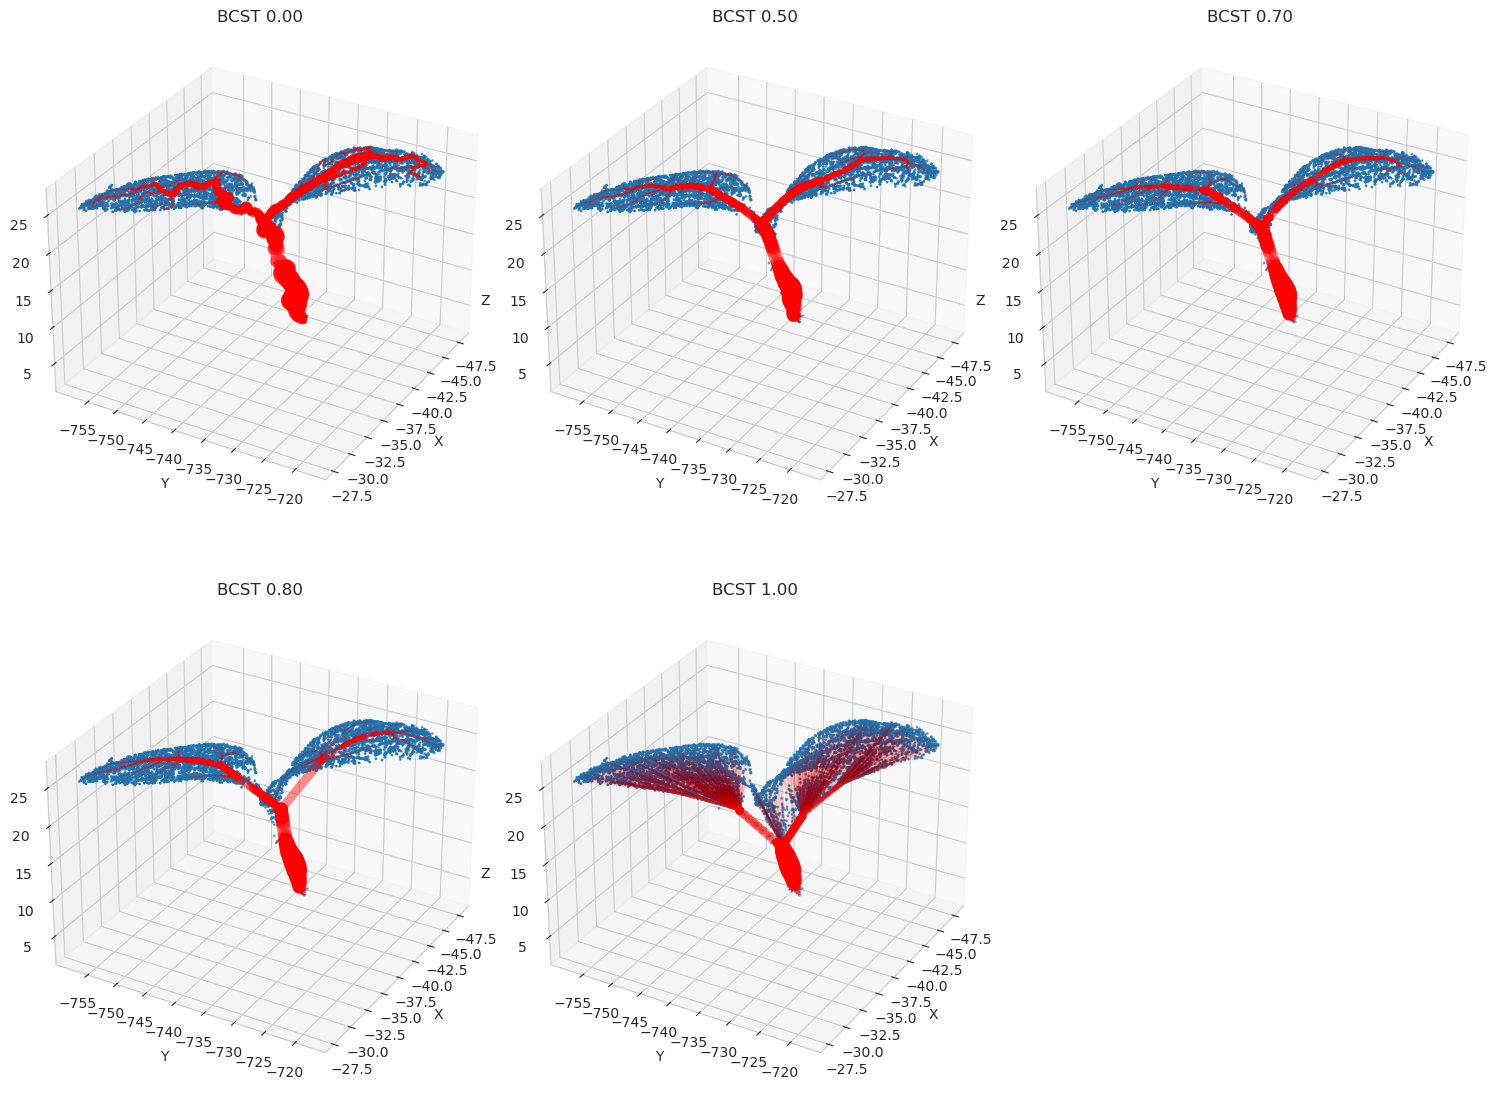

In [11]:
tdata_prior=tdata_dict[key+'_prior']

k1,k2=factor_number(len(alpha_ls))


separated = False


folder_figures=define_foldername(plant_type,plant_num,n)

if save:
	separated=True
	os.makedirs(folder_figures,True)

for counter_plot,alpha in enumerate(alpha_ls):

	T_flows=tdata_prior.trees['BCST_%0.2f'%alpha].get_T_weighted_by_flows()
	if power_width!=1:
		T_flows.data**=power_width
	T_flows*=max_width/T_flows.max()
	cost=tdata_prior.trees['BCST_%0.2f'%alpha].cost

	coords=tdata_prior.trees['BCST_%0.2f'%alpha].coords

	if separated:
		k1=k2=1
		counter_plot=0

	if save:
		title=''
	else:
		title='BCST %0.2f'%(alpha)
	fig, ax=plot_graph_3d(T_flows,coords,node_size=1,node_colors=None,linewidth_multiplier=1,
				  title=title,show_plot=False,k1=k1,k2=k2,counter_plot=counter_plot,
						  figsize=(15,12),elevation_angle=elevation_angle,
				  azimuthal_angle=azimuthal_angle)
	if save:
		plt.tight_layout()
		filename=define_filename(key,alpha,n,prior=True)
		plt.savefig(folder_figures+filename+'.png')

	if generate_gif:
		generate_rotation_gif(T_flows, coords, node_colors=None, node_size=1,
                       title='BCST %0.2f'%alpha, edge_color='red',
                       figsize=(15,12), num_frames=num_frames_gif, output_filename=folder_figures+filename+'.gif')

plt.tight_layout()
plt.show()

## DAY8

### Load data

(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: title={'center': 'Subsampled data with 5000 points'}, xlabel='X', ylabel='Y', zlabel='Z'>)

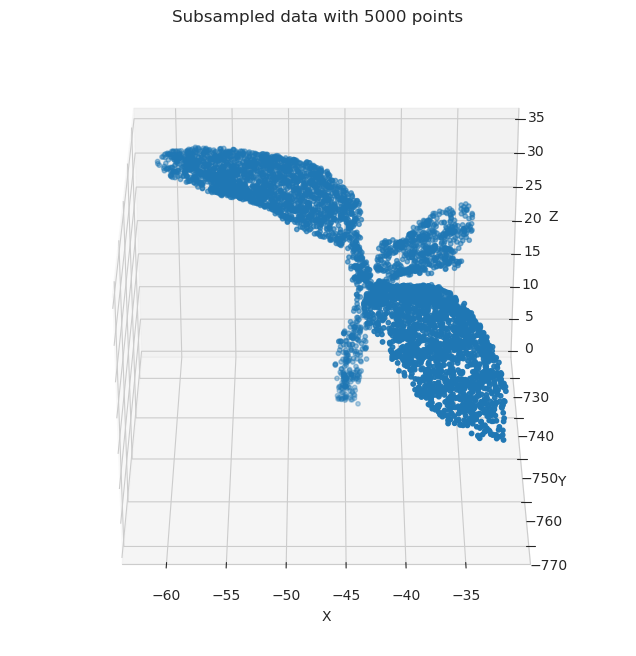

In [12]:
np.random.seed(seed)
#set day plant
day=8

# set visualization angles
elevation_angle=30
azimuthal_angle=-90

# load data
data=load_plantdata(plant_type, plant_num, day)
key='%s_plant%i_day%i'%(plant_type,plant_num,day)

#subsample n points
data_sub=data[np.random.choice(np.arange(data.shape[0]),n,replace=False)]

visualize_data_3d(data_sub,title='Subsampled data with %i points'%n,show_plot=False,elevation_angle=elevation_angle,
				  azimuthal_angle=azimuthal_angle)

#### Compute BCST

In [13]:


tdata_dict[key]=T_data(data_sub)
tdata=tdata_dict[key]

for alpha in alpha_ls:
	tdata.compute_BCST(alpha=alpha,return_topo_CST=False,maxfreq_mSTreg=maxfreq_mSTreg,maxiter_mSTreg=maxiter_mSTreg)

INFO:Tdata_logger:Added  'X' to data

INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing mST 

INFO:Tdata_logger:Added  mST to trees

INFO:Tdata_logger:Computing BCST_0.00


best mSTreg obtained in iteration 9


INFO:Tdata_logger:Added  BCST_0.00 to trees

INFO:Tdata_logger:Function compute_BCST took 113.1001 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.50


best mSTreg obtained in iteration 17


INFO:Tdata_logger:Added  BCST_0.50 to trees

INFO:Tdata_logger:Function compute_BCST took 183.3703 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.70


best mSTreg obtained in iteration 11


INFO:Tdata_logger:Added  BCST_0.70 to trees

INFO:Tdata_logger:Function compute_BCST took 204.6714 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.80


best mSTreg obtained in iteration 14


INFO:Tdata_logger:Added  BCST_0.80 to trees

INFO:Tdata_logger:Function compute_BCST took 225.2900 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_1.00


best mSTreg obtained in iteration 19


INFO:Tdata_logger:Added  BCST_1.00 to trees

INFO:Tdata_logger:Function compute_BCST took 169.2959 seconds


#### Plot trees

/export/home/enfita/Code/CST_official_github_repo/Experiments/Plant_skeletonization/visualization3D.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, s=node_size, cmap='viridis', marker='o')


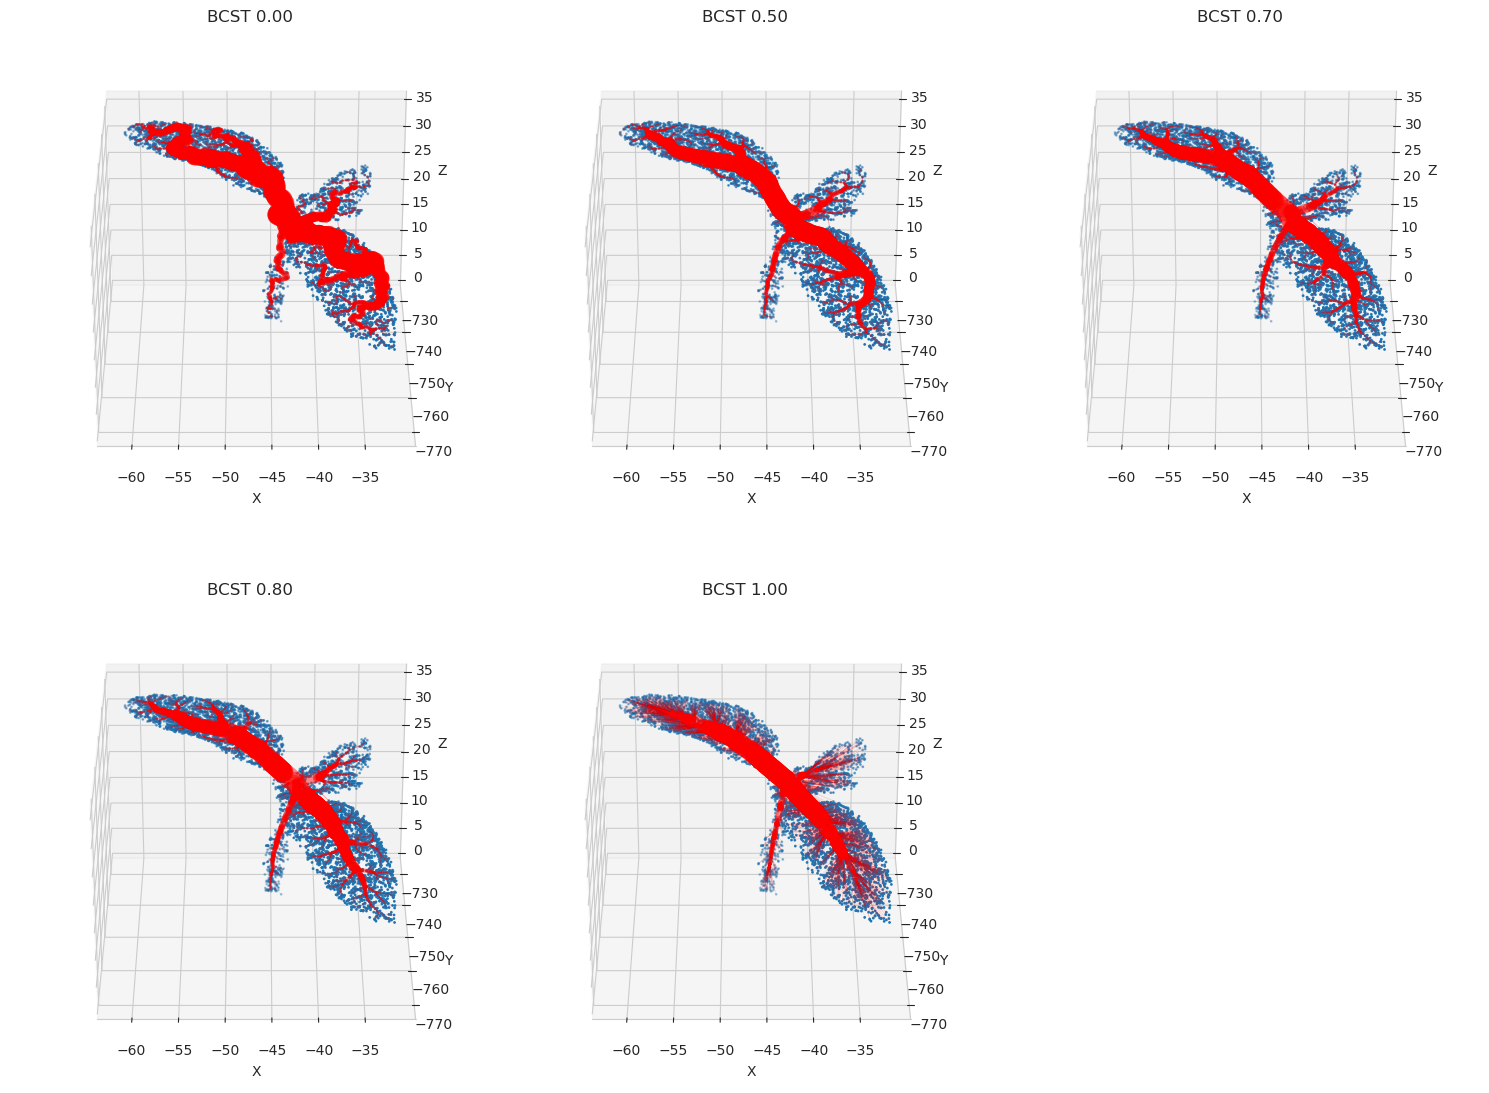

In [14]:
tdata=tdata_dict[key]

k1,k2=factor_number(len(alpha_ls))


separated = False


folder_figures=define_foldername(plant_type,plant_num,n)

if save:
	separated=True
	os.makedirs(folder_figures,True)

for counter_plot,alpha in enumerate(alpha_ls):

	T_flows=tdata.trees['BCST_%0.2f'%alpha].get_T_weighted_by_flows()
	if power_width!=1:
		T_flows.data**=power_width
	T_flows*=max_width/T_flows.max()
	cost=tdata.trees['BCST_%0.2f'%alpha].cost

	coords=tdata.trees['BCST_%0.2f'%alpha].coords

	if separated:
		k1=k2=1
		counter_plot=0

	if save:
		title=''
	else:
		title='BCST %0.2f'%(alpha)
	fig, ax=plot_graph_3d(T_flows,coords,node_size=1,node_colors=None,linewidth_multiplier=1,
				  title=title,show_plot=False,k1=k1,k2=k2,counter_plot=counter_plot,
						  figsize=(15,12),elevation_angle=elevation_angle,
				  azimuthal_angle=azimuthal_angle)
	if save:
		plt.tight_layout()
		filename=define_filename(key,alpha,n,prior=False)
		plt.savefig(folder_figures+filename+'.png')

	if generate_gif:
		generate_rotation_gif(T_flows, coords, node_colors=None, node_size=1,
                       title='BCST %0.2f'%alpha, edge_color='red',
                       figsize=(15,12), num_frames=num_frames_gif, output_filename=folder_figures+filename+'.gif')
plt.tight_layout()
plt.show()

#### Compute BCST with prior root

In [15]:
# set number of times root is repeated
root_reps=factor_rep*len(data_sub)

# identify root as the one with lowest z-coordinate
root=np.argmin(data_sub[:,2])

# consider also as roots the terminals are above a certain threshold from the lowest terminal
pseudo_roots=np.where(data_sub[:,2]<=data_sub[root,2]+offset_base_root_prior)[0]

#set mass of roots
demands=-np.ones(data_sub.shape[0])/(data_sub.shape[0]+root_reps-1)
for r in pseudo_roots:
	demands[r]=1/(data_sub.shape[0]+root_reps-1)
	if r==root:
		demands[root]=root_reps/len(pseudo_roots)/(data_sub.shape[0]+root_reps-1)
	else:
		demands[r] = -root_reps / len(pseudo_roots) / (data_sub.shape[0] + root_reps - 1)

tdata_dict[key+'_prior']=T_data(data_sub)
tdata_prior=tdata_dict[key+'_prior']


for alpha in alpha_ls:
	tdata_prior.compute_BCST(alpha=alpha,return_topo_CST=False,maxfreq_mSTreg=maxfreq_mSTreg,maxiter_mSTreg=maxiter_mSTreg,
							 demands=demands)

INFO:Tdata_logger:Added  'X' to data

INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing mST 

INFO:Tdata_logger:Added  mST to trees

INFO:Tdata_logger:Computing BCST_0.00


best mSTreg obtained in iteration 2


INFO:Tdata_logger:Added  BCST_0.00 to trees

INFO:Tdata_logger:Function compute_BCST took 119.3267 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.50


best mSTreg obtained in iteration 14


INFO:Tdata_logger:Added  BCST_0.50 to trees

INFO:Tdata_logger:Function compute_BCST took 185.5982 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.70


best mSTreg obtained in iteration 13


INFO:Tdata_logger:Added  BCST_0.70 to trees

INFO:Tdata_logger:Function compute_BCST took 220.9163 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.80


best mSTreg obtained in iteration 13


INFO:Tdata_logger:Added  BCST_0.80 to trees

INFO:Tdata_logger:Function compute_BCST took 230.9227 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_1.00


best mSTreg obtained in iteration 2


INFO:Tdata_logger:Added  BCST_1.00 to trees

INFO:Tdata_logger:Function compute_BCST took 138.1637 seconds


/export/home/enfita/Code/CST_official_github_repo/Experiments/Plant_skeletonization/visualization3D.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, s=node_size, cmap='viridis', marker='o')


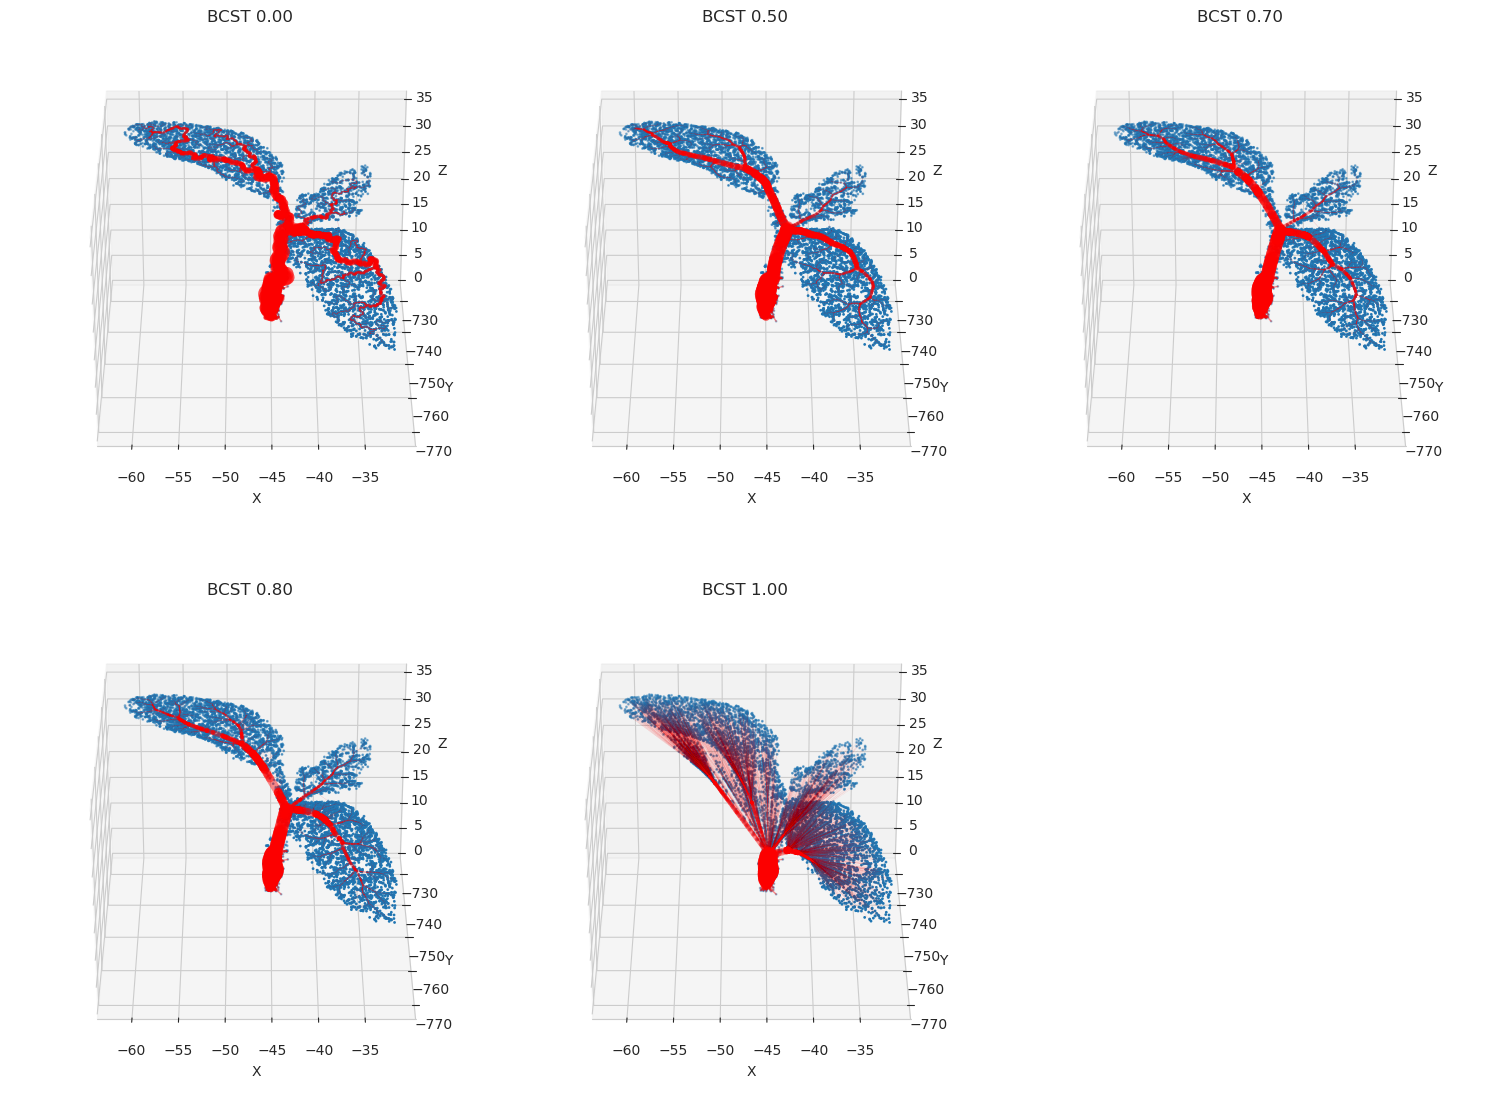

In [16]:
tdata_prior=tdata_dict[key+'_prior']

k1,k2=factor_number(len(alpha_ls))


separated = False


folder_figures=define_foldername(plant_type,plant_num,n)

if save:
	separated=True
	os.makedirs(folder_figures,True)

for counter_plot,alpha in enumerate(alpha_ls):

	T_flows=tdata_prior.trees['BCST_%0.2f'%alpha].get_T_weighted_by_flows()
	if power_width!=1:
		T_flows.data**=power_width
	T_flows*=max_width/T_flows.max()
	cost=tdata_prior.trees['BCST_%0.2f'%alpha].cost

	coords=tdata_prior.trees['BCST_%0.2f'%alpha].coords

	if separated:
		k1=k2=1
		counter_plot=0

	if save:
		title=''
	else:
		title='BCST %0.2f'%(alpha)
	fig, ax=plot_graph_3d(T_flows,coords,node_size=1,node_colors=None,linewidth_multiplier=1,
				  title=title,show_plot=False,k1=k1,k2=k2,counter_plot=counter_plot,
						  figsize=(15,12),elevation_angle=elevation_angle,
				  azimuthal_angle=azimuthal_angle)
	if save:
		plt.tight_layout()
		filename=define_filename(key,alpha,n,prior=True)
		plt.savefig(folder_figures+filename+'.png')

	if generate_gif:
		generate_rotation_gif(T_flows, coords, node_colors=None, node_size=1,
                       title='BCST %0.2f'%alpha, edge_color='red',
                       figsize=(15,12), num_frames=num_frames_gif, output_filename=folder_figures+filename+'.gif')
plt.tight_layout()
plt.show()

## DAY13

### Load data

(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: title={'center': 'Subsampled data with 5000 points'}, xlabel='X', ylabel='Y', zlabel='Z'>)

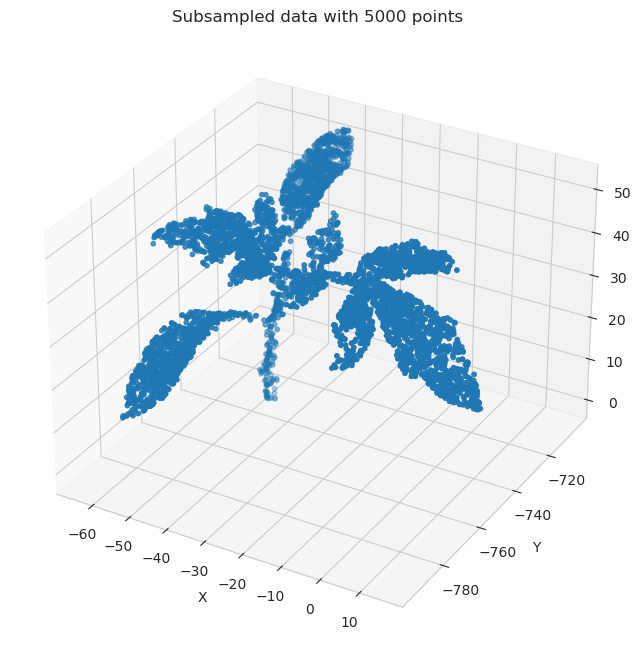

In [17]:
np.random.seed(seed)
#set day plant
day=13

# set visualization angles
elevation_angle=None
azimuthal_angle=None

# load data
data=load_plantdata(plant_type, plant_num, day)
key='%s_plant%i_day%i'%(plant_type,plant_num,day)

#subsample n points
data_sub=data[np.random.choice(np.arange(data.shape[0]),n,replace=False)]

visualize_data_3d(data_sub,title='Subsampled data with %i points'%n,show_plot=False,elevation_angle=elevation_angle,
				  azimuthal_angle=azimuthal_angle)

#### Compute BCST

In [18]:
tdata_dict[key]=T_data(data_sub)
tdata=tdata_dict[key]

for alpha in alpha_ls:
	tdata.compute_BCST(alpha=alpha,return_topo_CST=False,maxfreq_mSTreg=maxfreq_mSTreg,maxiter_mSTreg=maxiter_mSTreg)

INFO:Tdata_logger:Added  'X' to data

INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing mST 

INFO:Tdata_logger:Added  mST to trees

INFO:Tdata_logger:Computing BCST_0.00


best mSTreg obtained in iteration 11


INFO:Tdata_logger:Added  BCST_0.00 to trees

INFO:Tdata_logger:Function compute_BCST took 100.3437 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.50


best mSTreg obtained in iteration 10


INFO:Tdata_logger:Added  BCST_0.50 to trees

INFO:Tdata_logger:Function compute_BCST took 179.8373 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.70


best mSTreg obtained in iteration 3


INFO:Tdata_logger:Added  BCST_0.70 to trees

INFO:Tdata_logger:Function compute_BCST took 258.4928 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.80


best mSTreg obtained in iteration 17


INFO:Tdata_logger:Added  BCST_0.80 to trees

INFO:Tdata_logger:Function compute_BCST took 270.7893 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_1.00


best mSTreg obtained in iteration 9


INFO:Tdata_logger:Added  BCST_1.00 to trees

INFO:Tdata_logger:Function compute_BCST took 201.9839 seconds


#### Plot trees

/export/home/enfita/Code/CST_official_github_repo/Experiments/Plant_skeletonization/visualization3D.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, s=node_size, cmap='viridis', marker='o')


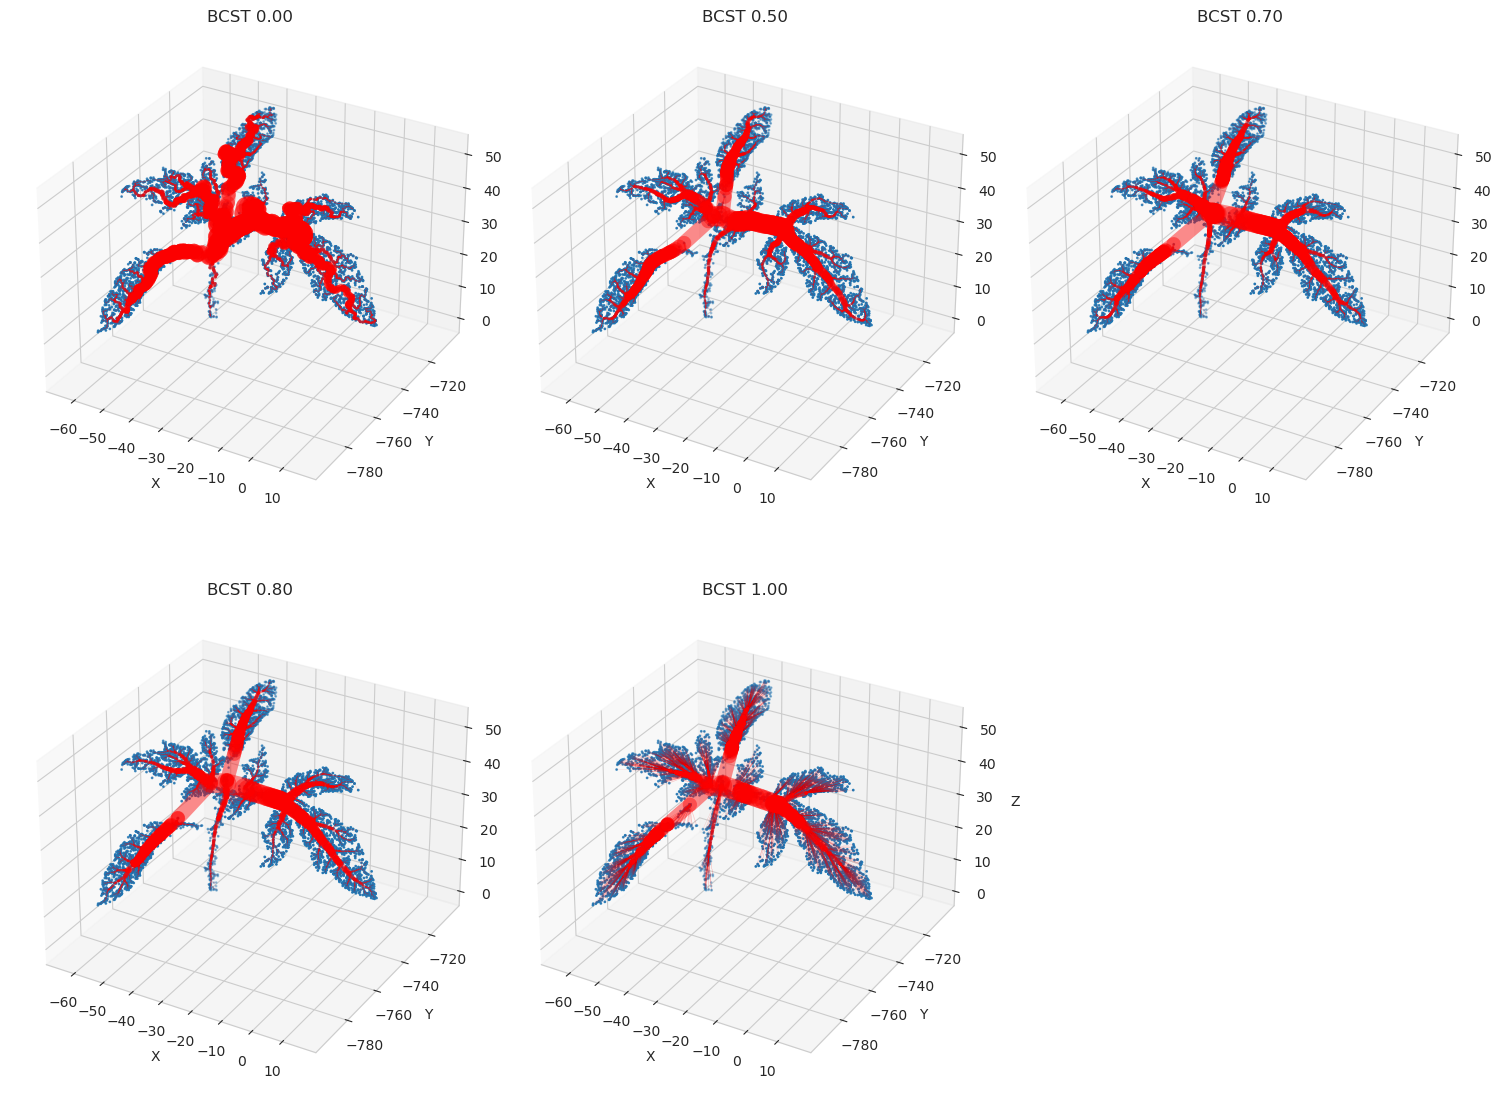

In [19]:
tdata_prior=tdata_dict[key]

k1,k2=factor_number(len(alpha_ls))


separated = False


folder_figures=define_foldername(plant_type,plant_num,n)

if save:
	separated=True
	os.makedirs(folder_figures,True)

for counter_plot,alpha in enumerate(alpha_ls):

	T_flows=tdata.trees['BCST_%0.2f'%alpha].get_T_weighted_by_flows()
	if power_width!=1:
		T_flows.data**=power_width
	T_flows*=max_width/T_flows.max()
	cost=tdata.trees['BCST_%0.2f'%alpha].cost

	coords=tdata.trees['BCST_%0.2f'%alpha].coords

	if separated:
		k1=k2=1
		counter_plot=0

	if save:
		title=''
	else:
		title='BCST %0.2f'%(alpha)
	fig, ax=plot_graph_3d(T_flows,coords,node_size=1,node_colors=None,linewidth_multiplier=1,
				  title=title,show_plot=False,k1=k1,k2=k2,counter_plot=counter_plot,
						  figsize=(15,12),elevation_angle=elevation_angle,
				  azimuthal_angle=azimuthal_angle)
	if save:
		plt.tight_layout()
		filename=define_filename(key,alpha,n,prior=False)
		plt.savefig(folder_figures+filename+'.png')

	if generate_gif:
		generate_rotation_gif(T_flows, coords, node_colors=None, node_size=1,
                       title='BCST %0.2f'%alpha, edge_color='red',
                       figsize=(15,12), num_frames=num_frames_gif, output_filename=folder_figures+filename+'.gif')

plt.tight_layout()
plt.show()

#### Compute BCST with prior root

In [20]:
# set number of times root is repeated
root_reps=factor_rep*len(data_sub)

# identify root as the one with lowest z-coordinate
root=np.argmin(data_sub[:,2])

# consider also as roots the terminals are above a certain threshold from the lowest terminal
pseudo_roots=np.where(data_sub[:,2]<=data_sub[root,2]+offset_base_root_prior)[0]

#set mass of roots
demands=-np.ones(data_sub.shape[0])/(data_sub.shape[0]+root_reps-1)
for r in pseudo_roots:
	demands[r]=1/(data_sub.shape[0]+root_reps-1)
	if r==root:
		demands[root]=root_reps/len(pseudo_roots)/(data_sub.shape[0]+root_reps-1)
	else:
		demands[r] = -root_reps / len(pseudo_roots) / (data_sub.shape[0] + root_reps - 1)

tdata_dict[key+'_prior']=T_data(data_sub)
tdata_prior=tdata_dict[key+'_prior']


for alpha in alpha_ls:
	tdata_prior.compute_BCST(alpha=alpha,return_topo_CST=False,maxfreq_mSTreg=maxfreq_mSTreg,maxiter_mSTreg=maxiter_mSTreg,
							 demands=demands)

INFO:Tdata_logger:Added  'X' to data

INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing mST 

INFO:Tdata_logger:Added  mST to trees

INFO:Tdata_logger:Computing BCST_0.00


best mSTreg obtained in iteration 12


INFO:Tdata_logger:Added  BCST_0.00 to trees

INFO:Tdata_logger:Function compute_BCST took 102.6053 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.50


best mSTreg obtained in iteration 13


INFO:Tdata_logger:Added  BCST_0.50 to trees

INFO:Tdata_logger:Function compute_BCST took 176.2224 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.70


best mSTreg obtained in iteration 20


INFO:Tdata_logger:Added  BCST_0.70 to trees

INFO:Tdata_logger:Function compute_BCST took 205.6612 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_0.80


best mSTreg obtained in iteration 18


INFO:Tdata_logger:Added  BCST_0.80 to trees

INFO:Tdata_logger:Function compute_BCST took 200.4821 seconds
INFO:Tdata_logger:Computing initial topology BCST mST
INFO:Tdata_logger:Computing BCST_1.00


best mSTreg obtained in iteration 3


INFO:Tdata_logger:Added  BCST_1.00 to trees

INFO:Tdata_logger:Function compute_BCST took 139.2551 seconds


#### Plot trees

/export/home/enfita/Code/CST_official_github_repo/Experiments/Plant_skeletonization/visualization3D.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, s=node_size, cmap='viridis', marker='o')


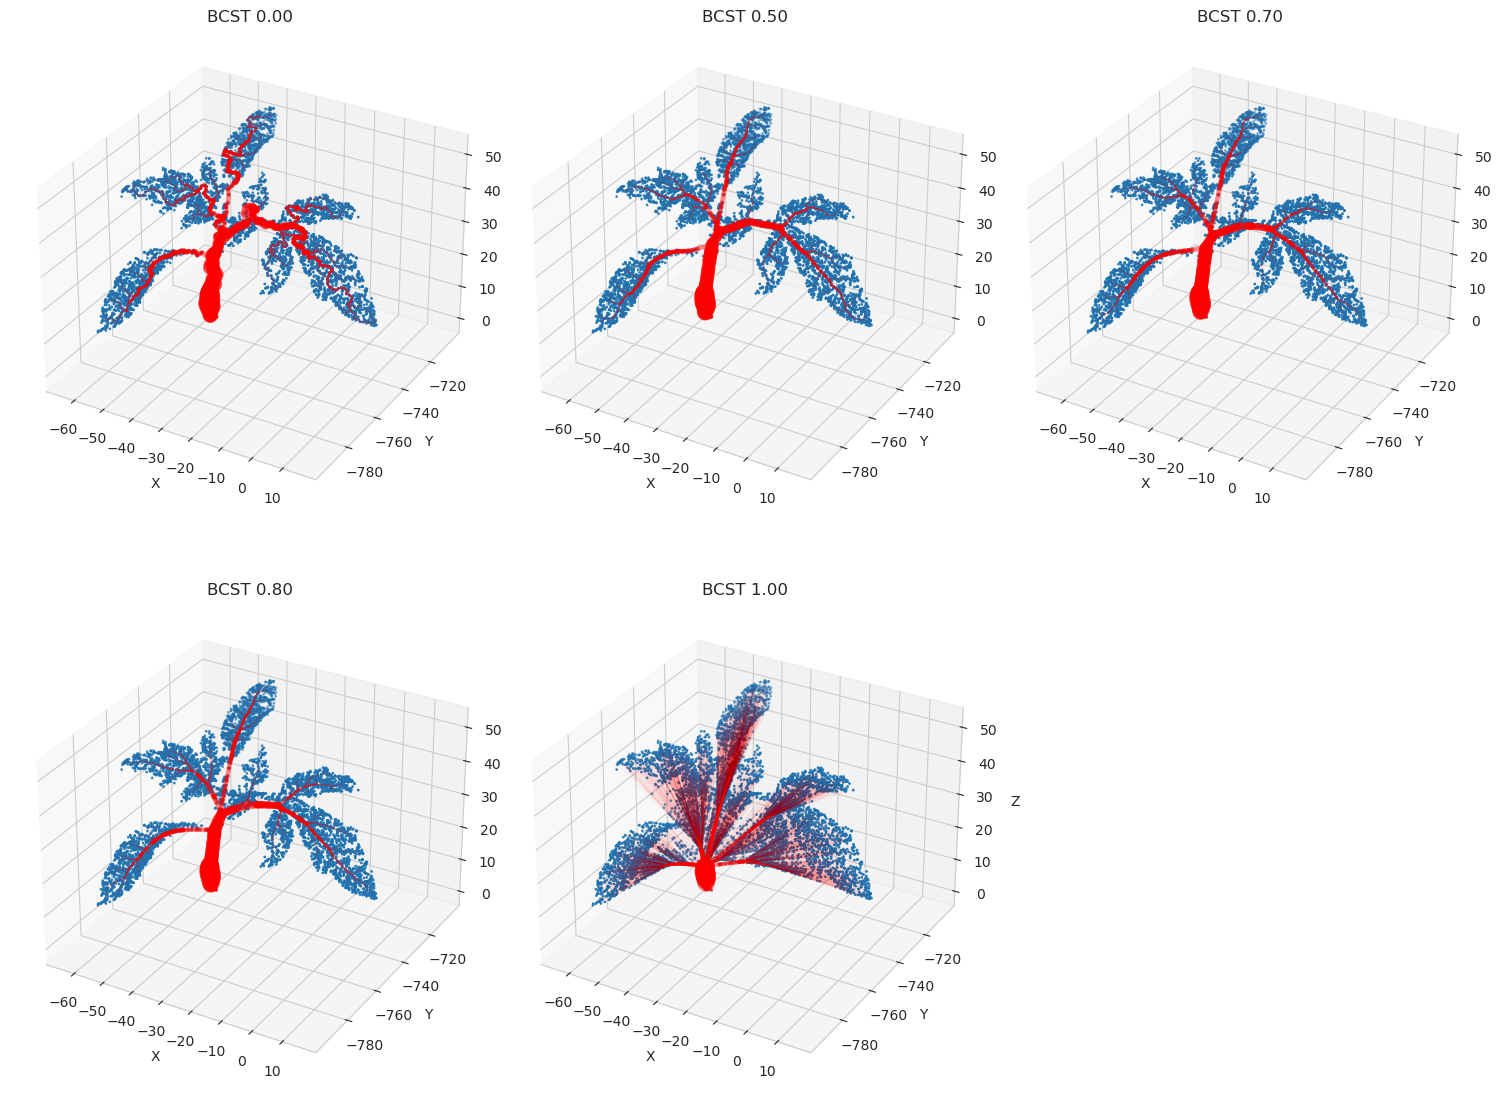

In [21]:

k1,k2=factor_number(len(alpha_ls))

separated = False
tdata_prior=tdata_dict[key+'_prior']


folder_figures=define_foldername(plant_type,plant_num,n)
if save:
	separated=True
	os.makedirs(folder_figures,True)


for counter_plot,alpha in enumerate(alpha_ls):

	T_flows=tdata_prior.trees['BCST_%0.2f'%alpha].get_T_weighted_by_flows()
	if power_width!=1:
		T_flows.data**=power_width
	T_flows*=max_width/T_flows.max()
	cost=tdata_prior.trees['BCST_%0.2f'%alpha].cost

	coords=tdata_prior.trees['BCST_%0.2f'%alpha].coords

	if separated:
		k1=k2=1
		counter_plot=0

	if save:
		title=''
	else:
		title='BCST %0.2f'%(alpha)
	fig, ax=plot_graph_3d(T_flows,coords,node_size=1,node_colors=None,linewidth_multiplier=1,
				  title=title,show_plot=False,k1=k1,k2=k2,counter_plot=counter_plot,
						  figsize=(15,12),elevation_angle=elevation_angle,
				  azimuthal_angle=azimuthal_angle)
	if save:
		plt.tight_layout()
		filename=define_filename(key,alpha,n,prior=True)
		plt.savefig(folder_figures+filename+'.png')

	if generate_gif:
		generate_rotation_gif(T_flows, coords, node_colors=None, node_size=1,
                       title='BCST %0.2f'%alpha, edge_color='red',
                       figsize=(15,12), num_frames=num_frames_gif, output_filename=folder_figures+filename+'.gif')
plt.tight_layout()
plt.show()